In [1]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/p

In [1]:
from manim import *

Manim Community v0.17.2

In [ ]:
%%manim -ql -v WARNING LinkLog

from scipy.integrate import quad
from scipy.optimize import fsolve

class LinkLog(Scene):
  def construct(self):

    k = ValueTracker(1)
    tal = DecimalNumber(k.get_value(), num_decimal_places=3)
    target = np.log(10)

    loglegend = Line([0,0,0],[0.2,0,0],color=BLUE)
    lnlegend = Line([0,0,0],[0.2,0,0],color=RED)

    logeq = MathTex(r"\log(x)\cdot")
    loglegend = Line([0,0,0],[0.2,0,0],color=BLUE).next_to(logeq,LEFT)
    lneq = MathTex(r"\ln(x)")
    lnlegend = loglegend.copy().set_color(RED).next_to(lneq,LEFT)
    tal.next_to(logeq,RIGHT)
    vlog = VGroup(logeq,loglegend,tal).to_corner(UL)
    vln = VGroup(lneq,lnlegend).next_to(vlog,DOWN).align_to(vlog,LEFT)

    self.add(vlog,vln)
    tal.add_updater(
        lambda m:m.become(DecimalNumber(k.get_value(), num_decimal_places=3).next_to(logeq,RIGHT))
    )

    def func(x):
      return np.log(x)

    def funcsol(x):
      y, err = quad(func, 0.1, x)
      return y + 0.5
    
    sol = fsolve(funcsol,0.5)
    print(sol)

    #************** FLASH OF FUNCTION *****************************
    # beregner længden af kurven
    def func2(x):#Definere funktionen
      return np.log(x)+4
    x_start = fsolve(func2,0.02)
    def func3(x):#Definere den afledte
      return np.sqrt(1+(1/(x**2)))
    L, err = quad(func3,x_start,7.1111111)#Beregner længden ved hjælp af integrale
    n = 50 #Definere hvor mange punkter der skal være
    l = L/n #Ud fra antallet af punkter beregnes længden af hvert enkelt linjestykke 
    dots = [[x_start,func(x_start),0]] #definere en variabel som indeholder koordinaterne på punkterne
    angles = [] #placeholder til vinklerne
    for i in range(n):
      def func4(x):#definere funktionen som er inde i integralet til beregning af længden
        return np.sqrt(1+(1/(x**2)))#dette kan måske undlades og func3 bruges i stedet for
      def func5(x):
        y, err = quad(func4,x_start,x)#opstiller integralet for længden fra x_start til x
        return y - l*i#trækker længdestykket fra ud fra antallet af små linjestykker l
      #print(func4(1))
      xp = fsolve(func5,0.02)#finder x for integralet
      v = np.arctan(1/xp) + PI/2#finder vinklen ud fra 
      angles.append(v)
    #  print(xp,func(xp))
      dots.append([xp,func(xp),0])

   # print(angles)
    
    points = VGroup()
    for j in range(n):
      dotp = Dot(point=[dots[j][0][0],dots[j][1][0],0])
      points.add(dotp)
      #self.add(dotp)
    
    #def create_lines(self) -> VGroup:
    lines = VGroup()
    for a in range(n):
      line = Line(points[a].get_center(), points[a].get_center() + 0.2 * RIGHT)
      line.next_to(points[a].get_center(),RIGHT)
      line.rotate(angles[a][0], about_point=points[a].get_center())
      line2 = line.copy()
      line2.rotate(PI,about_point=points[a].get_center())
      lines.add(line)
      lines.add(line2)
    lines.set_color(YELLOW)
    lines.set_stroke(width=3)
      #return lines
        


    #print(dots)
    #def diffunc(x):
    #  x = Symbol('x')
    #  f = log(x)
    #  #f = np.poly1d([1, 0, 1])
    #  #f_prime = f.diff(x)
    #  f_prime=f.deriv()
    #  #df = lambdify(x, f_prime)
    #  #return df(t)
    #  return f_prime(x)
    
    #diffunc
    
    #I = quad(func, 1, 2)

    #print(I)

    logfunc = FunctionGraph(lambda x: np.log10(x) * k.get_value(),
                            x_range=[0.0001,8],
                            color = BLUE
                            )
    lnfunc = FunctionGraph(lambda x: np.log(x), 
                           x_range= [0.018,8],
                           color = RED
                           )
    #diffunc2 = FunctionGraph(lambda x: diffunc(x),
    #                         x_range = [0.01,8])
    #print(len(func))

    logfunc.add_updater(
        lambda m:m.become(
            FunctionGraph(lambda x: np.log10(x) * k.get_value(),
                          x_range = [0.0001,8],
                          color = BLUE)
        )
    )

    distances = np.logspace(0.018,8,num=10)
    #print(distances)
    dots = []
    #for distance in distances:
    #  dot = Dot(point=[distance,np.log(distance)])
    #  dots.add(dot)

    self.add(logfunc,lnfunc)#,diffunc2)
    self.wait()
    #self.add(lines)
    #self.play(AnimationGroup(ShowPassingFlash(
    #            line,
    #            time_width=1,
    #            run_time=1,
    #            #**self.animation_config,
    #        )
    #        for line in lines))
    #for line in lines:
    #self.play(ShowPassingFlash(lines,time_width=1,run_time=0.5))
    #self.add(dots)

    #test = Dot(point=[1,1,0])
    #self.add(test)

    self.play(k.animate.set_value(3),run_time=2)#, if k.get_value()==2.3 test.animate.set_color(YELLOW))
    self.wait()
    self.play(k.animate.set_value(1),run_time=2)
    self.wait()
    #self.play(k.animate.set_value(np.log(10)))
    #ani_1 = AnimationGroup(k.animate.set_value(np.log(10)))
    #ani_2 = AnimationGroup(*[ShowPassingFlash(line) for line in lines],lag_ratio=1)
    #ani = AnimationGroup(ani_1,ani_2,lag_ratio=0.5)
    self.play(AnimationGroup(
        k.animate.set_value(np.log(10)),
        ShowPassingFlash(lines,time_width=1,run_time=0.5),
        lag_ratio=0.9,
        run_time=1.67
    ))
   # self.play(ani)
    #self.play(Succession(
    #    k.animate.set_value(np.log(10)),
    #    ShowPassingFlash(lines,time_width=1,run_time=0.5),
    #    lag_ratio=0.8
    #    ))
   ## self.play(Flash(logfunc))
    #self.play(Wiggle(lnfunc,rotate_about_point=[1,0,0],scale_value=1))
    self.wait()


[0.47722244]


[1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]
[1.00000000e-04 3.98107171e-04 1.58489319e-03 6.30957344e-03
 2.51188643e-02 1.00000000e-01 3.98107171e-01 1.58489319e+00
 6.30957344e+00 2.51188643e+01]


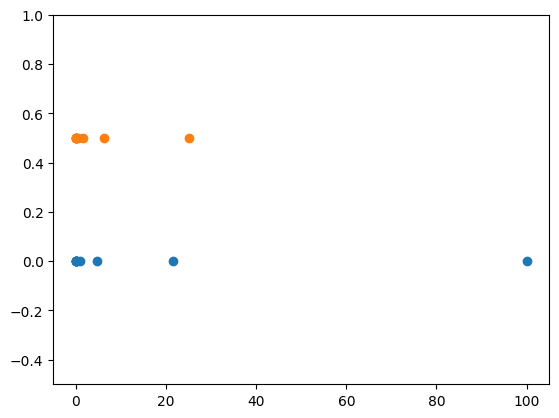

In [ ]:
import matplotlib.pyplot as plt

N = 10

x1 = np.logspace(-4, 2, N, endpoint=True)

x2 = np.logspace(-4, 1, N, endpoint=False)

y = np.zeros(N)

plt.plot(x1, y, 'o') #[<matplotlib.lines.Line2D object at 0x...>]

plt.plot(x2, y + 0.5, 'o')#[<matplotlib.lines.Line2D object at 0x...>]

plt.ylim([-0.5, 1])
(-0.5, 1)
print(x1)
print(x2)

plt.show()

In [ ]:
%%manim -ql -v WARNING SuccessionExample

class SuccessionExample(Scene):
    def construct(self):
        dot1 = Dot(point=LEFT * 2 + UP * 2, radius=0.16, color=BLUE)
        dot2 = Dot(point=LEFT * 2 + DOWN * 2, radius=0.16, color=MAROON)
        dot3 = Dot(point=RIGHT * 2 + DOWN * 2, radius=0.16, color=GREEN)
        dot4 = Dot(point=RIGHT * 2 + UP * 2, radius=0.16, color=YELLOW)
        self.add(dot1, dot2, dot3, dot4)

        self.play(Succession(
            dot1.animate.move_to(dot2),
            dot2.animate.move_to(dot3),
            dot3.animate.move_to(dot4),
            dot4.animate.move_to(dot1),
            lag_ratio = 0.5
        ))

In [ ]:
%%manim -ql -v WARNING ValueTrackerExample

class ValueTrackerExample(Scene):
  def construct(self):
    tracker = ValueTracker(0)
    label = Dot(radius=3).add_updater(lambda x: x.set_x(tracker.get_value()))
    test = Dot().to_corner(UL)
    #self.add(test)
    def update_tracker(obj):
      T=tracker.get_value()
      if T>0.5:
        obj.set_color(RED)
      else:
        obj.set_color(BLUE)
      if T==0.5:
        self.add_sound("drive/MyDrive/img-web/ui_click.wav")
      #lambda mobject, dt: mobject.increment_value(dt)

    self.add(label)
    self.add(tracker)
    #test.add_updater(update_color)
    tracker.add_updater(lambda mobject, dt: mobject.increment_value(dt))
    label.add_updater(update_tracker)
    self.wait(5)
    add_sound()

In [3]:
%%manim -ql -v WARNING Klik

from pydub import AudioSegment

class Klik(Scene):
  def construct(self):
    def add_sound2(
        self,
        sound_file: str,
        time: float | None = None,
        gain: float | None = None,
        **kwargs,
    ):
        """
        This method adds an audio segment from a sound file.

        Parameters
        ----------
        sound_file
            The path to the sound file.

        time
            The timestamp at which the audio should be added.

        gain
            The gain of the given audio segment.

        **kwargs
            This method uses add_audio_segment, so any keyword arguments
            used there can be referenced here.

        """
        file_path = self
        new_segment = AudioSegment.from_file(file_path)
        if gain:
            new_segment = new_segment.apply_gain(gain)
        self.add_audio_segment(new_segment, time, **kwargs)
    
    dot1 = Dot(color=RED).shift(2*LEFT)
    dot2 = Dot(color=BLUE).shift(2*RIGHT)

    self.add(dot1,dot2)
    self.wait()
    self.play(dot1.animate.move_to(dot2))
    self.wait()
    self.add_sound("ui-click")
    self.wait()

In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7038 sha256=4b9fdd733ae2a05081e9cff2260038131a3802312cdde459af258fa06fee56fc
  Stored in directory: /root/.cache/pip/wheels/73/cd/cf/9750b618d54bd81c20e4c34fb24a423a5b095920367cdb3f71
Successfully built playsound


In [ ]:
from playsound import playsound

playsound("drive/MyDrive/img-web/ui-click.wav")

CalledProcessError: ignored

In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import required modules

from pydub import AudioSegment

from pydub.playback import play
 
# for playing wav file

song = AudioSegment.from_wav("drive/MyDrive/img-web/Mouse-Click.mp3")

print('playing sound using  pydub')
play(song)

CouldntDecodeError: ignored